## 필요한 모듈 불러오기

In [2]:
import re
import os
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from datetime import datetime

## KNU 감성사전 데이터에서 단어에 대한 긍정/부정 값 추출

앞서 생성한 기사 자료와 감성 사전 데이터를 통합

In [3]:
Word_Senti = {}

File = open(".\\SentiWord_Dict.txt", "r", encoding = "utf-8")
wordFile = re.split('\t|\n', File.read())

for i in range(len(wordFile)//2 - 2):
    Word_Senti[wordFile[2*i]] = int(wordFile[2*i + 1])

print(Word_Senti) #감성사전을 dictionary 타입으로 '단어 - 감정의 수치'로 매칭

{'(-;': 1, '(;_;)': -1, '(^^)': 1, '(^-^)': 1, '(^^*': 1, '(^_^)': 1, '(^_^;': -1, '(^o^)': 1, '(-_-)': -1, '(T_T)': -1, '(ㅡㅡ)': -1, ')-:': -1, '*^^*': 1, '/^o^\\': 1, ':(': 1, ":'-(": 1, ':-(': 1, ':)': -1, ':-)': 1, ':/': -1, ':|': 1, ':D': -1, ':-D': -1, ':p': 0, ':-P': -1, ';': 1, ';)': 1, ';-)': 1, ';ㅅ;': -1, '^///^': 1, '^^': 1, '^^//': 1, '^-^;': -1, '^-^;;': -1, '^-^;;;;;': -1, '-_-^': -1, '<3': 1, '=)': 1, '8-)': 0, 'B-)': 0, 'XD': 1, 'ㄱㅅ': 1, 'ㄱㅇㄷ': 1, '가격이 싸다': 1, '가까스로': 0, '가까이 사귀어': 1, '가까이하다': 1, '가꾸러뜨리다': -1, '가꾸러트리다': -1, '가난': -2, '가난뱅이': -2, '가난살이': -2, '가난살이하다': -2, '가난설음': -2, '가난에': -2, '가난에 쪼들려서': -2, '가난하게': -2, '가난하고': -2, '가난하고 어렵다': -2, '가난하고 천한': -2, '가난하다': -2, '가난하여': -2, '가난한': -2, '가난한 데다가': -2, '가난한 사람을': -2, '가난히': -2, '가년스럽다': -2, '가념하다': -1, '가녕스럽다': -2, '가누기 어려워하다': -1, '가누지 못하고': -2, '가누지 못하다': -2, '가누지 못할': -2, '가누지 못할 정도로': -2, '가누지 못함': -2, '가눌 수 없게': -2, '가눌 수 없을': -2, '가눌 수 없이': -2, '가능성이 늘어나다': 2, '가능성이 있다고': 2, '가능하다': 2, '가닐가닐하다': -1, '가다듬어

## 대통령 지지율 월간 데이터 구축

In [57]:
File = open(".\\MoonRate.txt", "r", encoding = "utf-8")
VIPinfo = re.split(' |\n', File.read())

month = []
rate = []
diff = [0.0]

for i in range(len(VIPinfo)):
    if i%2 == 0:
        mon = int(VIPinfo[i])*100+28
        month.append(datetime.strptime(str(mon), '%Y%m%d'))
    else:
        rate.append(float(VIPinfo[i]))
        if i != 1:
            diff.append(float(VIPinfo[i]) - float(VIPinfo[i-2]))
        
VIPdf = pd.DataFrame()
VIPdf['달'] = month
VIPdf['지지율'] = rate
VIPdf['변동'] = diff

In [58]:
VIPdf

,달,지지율,변동
0,2017-06-28,81.6,0.0
1,2017-07-28,78.5,-3.1
2,2017-08-28,77.6,-0.9
3,2017-09-28,69.0,-8.6
4,2017-10-28,72.0,3.0
5,2017-11-28,73.4,1.4
6,2017-12-28,72.0,-1.4
7,2018-01-28,69.0,-3.0
8,2018-02-28,70.0,1.0
9,2018-03-28,73.5,3.5


## csv파일에서 분석이 용이한 type으로 데이터 변환

In [4]:
NEWS = []

f = open(os.getcwd()+ '/2_Data Prepration.csv', 'r', encoding = 'utf-8-sig')
f_csv = csv.reader(f)

for idx, row in enumerate(f_csv):
    if idx != 0:
        NEWS.append([])
        for idx_2, data in enumerate(row[:3]):
            if idx_2 == 1:
                new_date = re.sub('\.', '', data)
                NEWS[idx-1].append(new_date) #날짜를 DateFormatter로 변환
            elif idx_2 == 2:
                new_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·→!』\\‘|\(\)\[\]\<\>`\'…\"\“\’\”》]', ' ', data)
                NEWS[idx-1].append(new_title)
                senti = 0
                for word, value in Word_Senti.items(): #기사 제목을 단어에 따라 긍부정 수치로 변환
                    if word in new_title:
                        senti += value
                NEWS[idx-1].append(senti) 
            else:
                NEWS[idx-1].append(data)

In [5]:
print(NEWS)

[['한겨레', '20170510', ' 보수 10년  퇴행 바로잡고  미완의 개혁  진전시킬 기회', 0], ['한겨레', '20170510', ' 한겨레 사설  문재인 대통령  국민과 함께  나라다운 나라  만들길', 2], ['한겨레', '20170510', '미 언론  한국 시민혁명   대북압박 트럼프에 도전 ', 0], ['한겨레', '20170510', ' 한겨레 사설   통합과 공존  앞세운 문 대통령의 취임사', 1], ['한겨레', '20170510', ' 한겨레 사설   이낙연 총리 임종석 실장  인선에 거는 기대', 1], ['한겨레', '20170511', ' 한겨레 사설   비검찰 민정수석  발탁  검찰개혁의 마지막 기회다', 1], ['한겨레', '20170511', ' 한겨레 사설  조속한  한 미 정상회담 으로 한반도 현안 풀어야', 2], ['한겨레', '20170511', ' 한겨레 사설   군림하지 않는 열린 청와대  만들어가길', -1], ['한겨레', '20170512', ' 한겨레 사설  역사 퇴행 바로잡은 국정교과서 폐지', 1], ['한겨레', '20170512', ' 한겨레 사설  국정농단 재조사  특검이 정답이다', 1], ['한겨레', '20170512', ' 한겨레 사설  비정규직 해결 물꼬 튼  인천공항 1만명 전환 ', -1], ['한겨레', '20170514', ' 한겨레 사설  민주  새 정부도 꾸리기 전에  떡고물  놓고 다투나', 1], ['한겨레', '20170514', ' 한겨레 사설  대화 기류에 찬물 끼얹는 북한 미사일', -2], ['한겨레', '20170515', ' 한겨레 사설  유엔도 수정 권고한  한 일 위안부 합의 ', -1], ['한겨레', '20170515', ' 한겨레 사설  비정규직 난제  노동자의  논의 참여 가 먼저다', 1], ['한겨레', '20170515', ' 한겨레 사설   석탄발전 셧다운 으로 첫발 뗀 미세먼지 30  감축', 1], ['한겨레', '201705

### Project4A - 감정 수치 부여 정도를 학습하기 위한 데이터셋 저장

<AxesSubplot:>

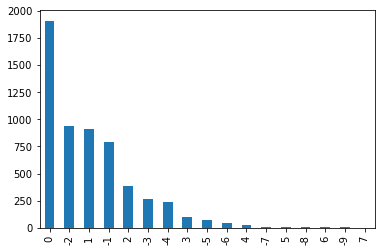

In [8]:
temp = pd.DataFrame()
temp['감정 수치'] = [NEWS[i][3] for i in range(len(NEWS))]
temp['감정 수치'].value_counts().plot(kind='bar')

감정 수치의 분포도에 의해, 감정 수치를 원본 사전에서처럼 조금 더 간략화한다.

매우 긍정(3 이상): 2, 긍정(1,2) -> 1, 중립(0) -> 0, 부정(-1,-2) -> -1, 매우 부정(-3 이하) -> -2

In [9]:
news = pd.DataFrame()
news['달'] = [NEWS[i][0] for i in range(len(NEWS))]
news['날짜'] = [NEWS[i][1] for i in range(len(NEWS))]
news['기사 제목'] = [NEWS[i][2] for i in range(len(NEWS))]

new_emot = []
for i in range(len(NEWS)):
    emot = NEWS[i][3]
    if emot >= 3:
        new_emot.append(2)
    elif emot == 1 or emot == 2:
        new_emot.append(1)
    elif emot == 0:
        new_emot.append(0)
    elif emot == -1 or emot == -2:
        new_emot.append(-1)
    else:
        new_emot.append(-2)
        

news['감정 수치'] = new_emot

<AxesSubplot:>

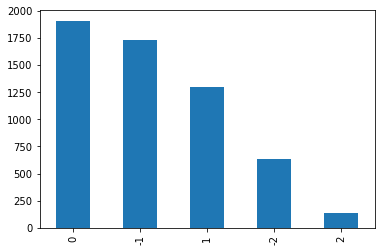

In [11]:
news['감정 수치'].value_counts().plot(kind='bar')

데이터가 적절한 비율로 간략하게 수치화되었다.

In [12]:
def FileNameCreate(form):
    return os.getcwd() + '/3_Data analysis_A.%s' %form

news.to_csv(FileNameCreate('csv'), encoding="utf-8-sig",index=False)
print("@: %s 위치에 성공적으로 csv 파일이 생성되었습니다! " %os.getcwd())

@: C:\Users\pscq2\Desktop\STUDY\Fourth Course\AI\SW_AI\K. Final 위치에 성공적으로 csv 파일이 생성되었습니다! 


## 데이터의 기간을 월 단위로 조정

In [14]:
date_data = [[2017, 6, 12], [2018, 1, 12], [2019, 1, 12], [2020, 1, 12], [2021, 1, 11]] #데이터 조사 기간에 맞춘 연도에 따른 조사달 정보
press_name = ['한겨레', '경향신문', '국민일보', '동아일보']

monthly_data = []
for press in press_name:
    for i in range(len(date_data)):
        for month in range(date_data[i][1], date_data[i][2] + 1):
            monthly_data.append([date_data[i][0] * 10000 + month * 100 + 28, press, 0, 0, []]) 
        #각 row의 정보; (연도/달[날짜는 28일을 표준으로 함], 언론사, 감정 수치 월평균, 기사의 갯수, 월별 기사 제목들)

In [15]:
for line in NEWS:
    for i in range(len(monthly_data)):
        if int(line[1])//100 == monthly_data[i][0]//100 and line[0] == monthly_data[i][1]:
            monthly_data[i][2] += line[3] 
            monthly_data[i][3] += 1
            monthly_data[i][4].append(line[2])
            
for i in range(len(monthly_data)):
    monthly_data[i][0] = datetime.strptime(str(monthly_data[i][0]), '%Y%m%d')
    monthly_data[i][2] /= monthly_data[i][3]
            
print(monthly_data)

[[datetime.datetime(2017, 6, 28, 0, 0), '한겨레', -0.3448275862068966, 58, [' 한겨레 사설   여야정 협의체  약속까지 깨버린 자유한국당', ' 한겨레 사설  공무원 증원   공공서비스 확충 이 핵심이다', ' 한겨레 사설  국정원  정치 불개입  약속  법 바꿔 못 뒤집게 해야', ' 한겨레 사설  과도한 의혹 제기로 끝난  김상조 청문회 ', ' 한겨레 사설  사드 배치  환경영향평가 이제라도 제대로 해야', ' 한겨레 사설  안보실 2차장 낙마   검증 강화  계기 삼아야', ' 한겨레 사설   사드 도입  모든 과정 이 기회에 제대로 점검해야', ' 한겨레 사설  사상 최악의 청년실업과  일자리 추경 ', ' 사설 속으로  한겨레 중앙일보   고위 공직자 인사 배제 원칙  사설 비교   ', ' 한겨레 사설  보훈의 의미 새롭게 새긴 현충일 추념사', ' 한겨레 사설  검찰농단 진상 밝혀내지 못한  돈봉투 감찰 ', ' 한겨레 사설  민생 공약 이행 첫 시험대 오른  가계 통신비 인하 ', ' 한겨레 사설  6월항쟁 30돌  진정한  시민권력 시대  열어야', ' 한겨레 사설  고리 1호기뿐 아니라 월성 1호기도 폐쇄해야', ' 한겨레 사설   사회적 대화  물꼬 튼 민주노총의 일자리위 참여', ' 한겨레 사설   강경화 낙마  밀어붙이는 국민의당의 착각', ' 한겨레 사설   가계부채 대책  너무 뜸들이지 말고 내놔야', ' 한겨레 사설  교육 법무장관 후보  파격 넘는 개혁 보여주길', ' 한겨레 사설  양심적 병역거부자  대체복무  도입 서둘러야', ' 한겨레 사설   일자리 추경  절박성 호소한 대통령의 시정연설', ' 사설 속으로  한겨레 중앙일보   정치인 입각  사설 비교해보기', ' 한겨레 사설  끝내 무산된 김이수 김상조 청문보고서 채택', ' 한겨레 사설   대법원 혁신  국민요구 반영해 후보 제청해야', ' 한겨레 사설  김상조 공정위원장 임명 불가피했다', '한 미 29 30일

In [16]:
df = pd.DataFrame()
df['달'] = [monthly_data[i][0] for i in range(len(monthly_data))]
df['언론사'] = [monthly_data[i][1] for i in range(len(monthly_data))]
df['감정 수치'] = [monthly_data[i][2] for i in range(len(monthly_data))]
df['기사 갯수'] = [monthly_data[i][3] for i in range(len(monthly_data))]

In [17]:
df

,달,언론사,감정 수치,기사 갯수
0,2017-06-28,한겨레,-0.344828,58
1,2017-07-28,한겨레,-0.759259,54
2,2017-08-28,한겨레,-0.738095,42
3,2017-09-28,한겨레,-0.829268,41
4,2017-10-28,한겨레,-1.120000,25
...,...,...,...,...
211,2021-07-28,동아일보,-0.421053,19
212,2021-08-28,동아일보,-0.550000,20
213,2021-09-28,동아일보,-0.176471,17
214,2021-10-28,동아일보,-0.666667,12


## 기사의 양적 분석

In [71]:
font_path = "C:\\Windows\\Fonts\\IROPKEBATANGM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)
L = len(df) // 4

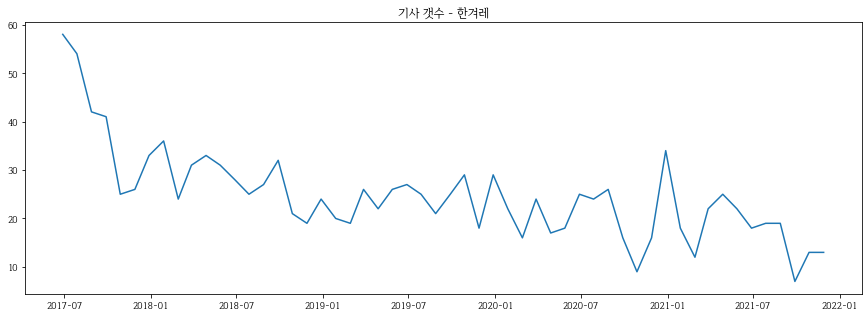

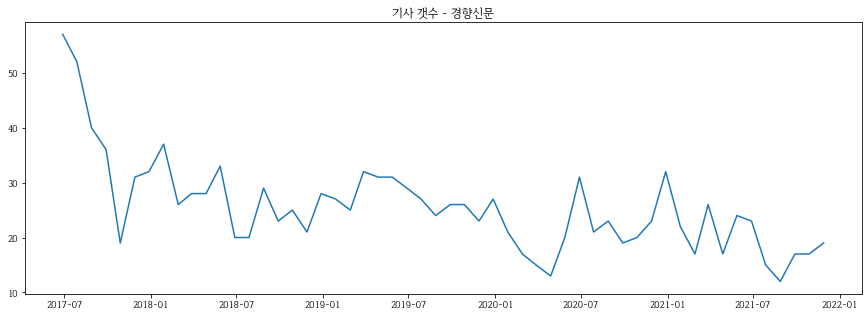

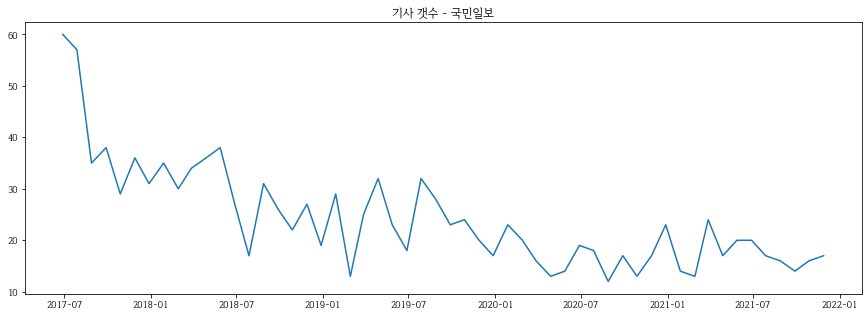

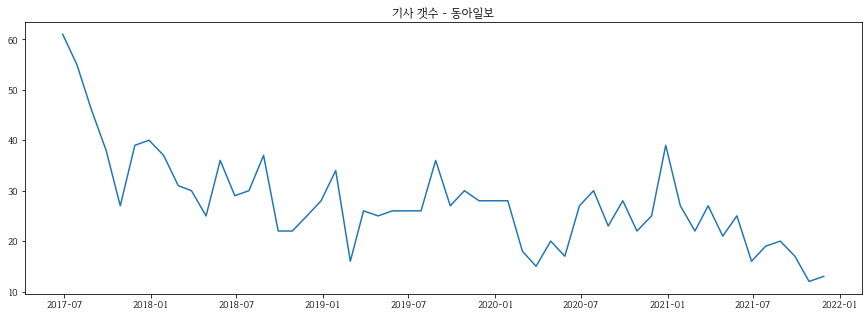

In [72]:
for i in range(len(press_name)):
    plt.subplots(1, 1, figsize=(15, 5))
    plt.plot(df['달'][(i*L):((i+1)*L)], df['기사 갯수'][(i*L):((i+1)*L)])
    plt.title('기사 갯수 - %s' %press_name[i])

plt.show()

취임 기간이 길어질수록 문재인 대통령을 향한 모든 언론의 사설이 줄어들고 있음. 

## 지지율과 언론사 기사의 상관관계 분석

In [117]:
Newdf = pd.DataFrame()
Newdf['달'] = df['달'][:54]
for idx, name in enumerate(press_name):
    Newdf['%s - 감정' %name] = list(df["감정 수치"][(idx*54):((idx+1)*54)])
for idx, name in enumerate(press_name):
    Newdf['%s - 갯수' %name] = list(df["기사 갯수"][(idx*54):((idx+1)*54)])
    
Newdf['지지율'] = VIPdf['지지율']

In [118]:
Newdf

,달,한겨레 - 감정,경향신문 - 감정,국민일보 - 감정,동아일보 - 감정,한겨레 - 갯수,경향신문 - 갯수,국민일보 - 갯수,동아일보 - 갯수,지지율
0,2017-06-28,-0.344828,-0.561404,-0.016667,-0.147541,58,57,60,61,81.6
1,2017-07-28,-0.759259,-0.288462,-0.315789,-0.454545,54,52,57,55,78.5
2,2017-08-28,-0.738095,-0.775000,-0.142857,-0.326087,42,40,35,46,77.6
3,2017-09-28,-0.829268,-0.583333,-0.026316,-0.315789,41,36,38,38,69.0
4,2017-10-28,-1.120000,-0.789474,-0.689655,-0.296296,25,19,29,27,72.0
5,2017-11-28,-0.538462,-0.935484,-0.027778,-0.333333,26,31,36,39,73.4
6,2017-12-28,-0.454545,0.000000,-0.193548,0.375000,33,32,31,40,72.0
7,2018-01-28,-0.333333,-1.270270,-0.800000,-0.918919,36,37,35,37,69.0
8,2018-02-28,-1.291667,-0.730769,-0.700000,-0.322581,24,26,30,31,70.0
9,2018-03-28,-0.290323,0.321429,-1.235294,-0.700000,31,28,34,30,73.5


<AxesSubplot:>

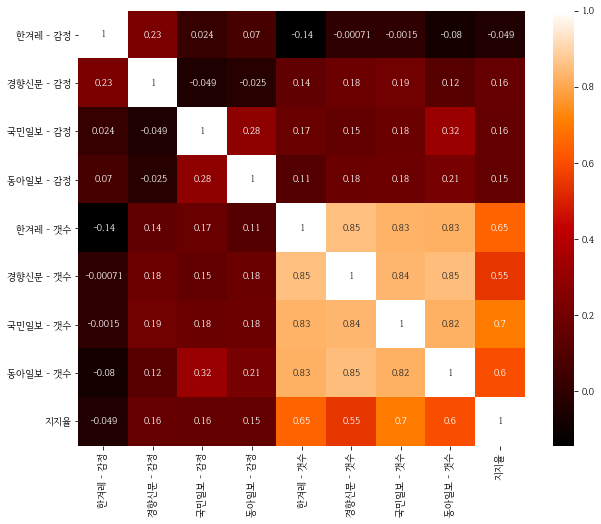

In [119]:
import seaborn as sns

colormap = plt.cm.gist_heat
plt.figure(figsize=(10, 8))

sns.heatmap(Newdf.corr(), cmap=colormap, annot=True)

프레임 효과가 지지율 변동에 미칠 것이라는 가설과는 달리, 모든 언론에 있어서 상관도가 떨어짐.
그러나 정치 성향을 떠나 모든 언론이 매달 내는 대통령에 대한 기사의 양적 데이터가 지지율과 상당한 상관도가 있음을 보임. 이는 정책에 대한 관심도가 국민에게 잘 직결되야만 지지로 이어짐을 보여줌

본 자료는 시간에 따라 데이터가 변동하므로, 같은 사건에 대한 서로 다른 기사 제목의 시각을 비교할 수 있음.
앞서 언론을 정치성향에 따라 구분했던 것처럼, colormap에서도 진보 언론(한겨레 - 경향)끼리의 편향 상관도,
보수 언론(동아 - 국민)끼리의 상관도가 서로 다른 두 진영의 상관도보다 유의미하게 높은 편임